In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime
import os.path
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException

In [3]:
def date_location():
    today = datetime.today()
    margin = today.replace(day=1).weekday()
    month = today.month
    year = today.year
    day = today.day
    weekday = today.weekday()
    row = (day + margin) // 7 if (day+margin) % 7 == 0 else (day+margin)//7 + 1
    column = weekday + 1
    return day, month, year, row, column
    
    

In [4]:

driver = webdriver.Chrome()

driver.get("https://www.finam.ru/profile/moex-akcii/novatek/export/")

company_list = ['Новатэк ао', 'СевСТ-ао', 'Магнит ао', 'FIVE-гдр', 'Лента др' ]
k = 0
timeframes = { '1 минута': 2,
                '5 минут':3,
                '10 минут':4,
                '15 минут':5,
                '30 минут':6,
                '1 час':7,
                '1 день':8,
                '1 неделя':9,
                '1 месяц':10
             }
chosen_time = timeframes['5 минут']
wait = WebDriverWait(driver, 2)
for company in company_list:
    
    #switch to company
    company_name = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="issuer-profile-header"]/div[2]/input')))
    company_name.send_keys(Keys.CONTROL + "a");
    company_name.send_keys(Keys.DELETE);
    company_name.send_keys(company)
    company_name.send_keys(Keys.ENTER)
    
    time.sleep(1)
    
    if k == 0:
        
        #Timeframe
        timeframe = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="issuer-profile-export-first-row"]/td[3]/div/div[1]')))
        timeframe.click()
        
        try:
            new_timeframe = wait.until(EC.element_to_be_clickable((By.XPATH,f'/html/body/div[19]/div/ul/li[{chosen_time}]/a')))
            new_timeframe.click()
        except TimeoutException:
            new_timeframe = wait.until(EC.element_to_be_clickable((By.XPATH,f'/html/body/div[18]/div/ul/li[{chosen_time}]/a')))
            new_timeframe.click()
       
        #extensions //*[@id="issuer-profile-export-second-row"]/td[3]/div/div[1]
        extension = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="issuer-profile-export-second-row"]/td[3]/div/div[1]')))
        extension.click()
        

        try:
            new_extension = wait.until(EC.element_to_be_clickable((By.XPATH,'/html/body/div[19]/div/ul/li[2]/a')))
            new_extension.click()
        except TimeoutException:
            new_extension = wait.until(EC.element_to_be_clickable((By.XPATH,'/html/body/div[20]/div/ul/li[2]/a')))
            new_extension.click()

        #delimiters
        delimiter = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="issuer-profile-export-separator-row"]/td[3]/div/div[1]')))
        delimiter.click()

        new_delimiter = wait.until(EC.element_to_be_clickable((By.XPATH,'/html/body/div[22]/div/ul/li[1]')))
        new_delimiter.click()

        #start_date
        start_date_picker = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="issuer-profile-export-from"]')))
        start_date_picker.click()

        start_month_picker = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-datepicker-div"]/div/div/select[1]')))
        start_month_picker.click()

        start_month_picked = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-datepicker-div"]/div/div/select[1]/option[3]')))
        start_month_picked.click()

        start_day_picked = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-datepicker-div"]/table/tbody/tr[1]/td[7]')))
        start_day_picked.click()

        #final date


        day, month, year, row, column = date_location()

        date_picker = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="issuer-profile-export-to"]')))
        date_picker.click()
        #time.sleep(3)

        month_picker = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-datepicker-div"]/div/div/select[1]')))
        month_picker.click()
        #time.sleep(3)

        month_picked = wait.until(EC.element_to_be_clickable((By.XPATH,f'//*[@id="ui-datepicker-div"]/div/div/select[1]/option[{month}]')))
        month_picked.click()
        #time.sleep(3)

        #year_picker = driver.find_element_by_xpath('//*[@id="ui-datepicker-div"]/div/div/select[2]')
        #year_picker.click()
        #time.sleep(3)

        day_picked = wait.until(EC.element_to_be_clickable((By.XPATH,f'//*[@id="ui-datepicker-div"]/table/tbody/tr[{row}]/td[{column}]')))
        day_picked.click()
        #time.sleep(3)

    #set name
    
    real_name = wait.until(EC.element_to_be_clickable((By.ID,"issuer-profile-export-contract")))
    new_name = real_name.get_attribute('value')
    
    
    name = wait.until(EC.element_to_be_clickable((By.ID,'issuer-profile-export-file-name')))
    
    name.send_keys(Keys.CONTROL + "a");
    name.send_keys(Keys.DELETE);
    name.send_keys(new_name)
    
    #download file
    name.send_keys(Keys.ENTER)
    
    while not os.path.exists(r"C:\Users\Admin\Downloads\{0}.csv".format(new_name)):
        #print('wait')
        time.sleep(0.1)
    
    k += 1
   
    #alert = driver.switch_to.alert
    #alert.accept()
    #time.sleep(10)
    #name.send_keys(Keys.ENTER)
#time.sleep(3)
driver.close()

In [5]:
import glob
import shutil

# I prefer to set path and mask as variables, but of course you can use values
# inside glob() and move()

source_files=r'C:\Users\Admin\Downloads\*.csv'
target_folder=r'C:\Users\Admin\Documents\finance\data'

# retrieve file list
filelist=glob.glob(source_files)
for single_file in filelist:
     # move file with full paths as shutil.move() parameters
    shutil.move(src = single_file,dst = target_folder + '\\' + os.path.basename(single_file)) 

In [6]:
import glob
# I prefer to set path and mask as variables, but of course you can use values
# inside glob() and move()

data = r'C:\Users\Admin\Documents\finance\data\*.csv'
filelist=glob.glob(data)
dataframes = {}
for single_file in filelist:
     # move file with full paths as shutil.move() parameters
    dataframes[os.path.basename(single_file)[:4]] = pd.read_csv(single_file)

In [7]:
def TYPICAL_PRICE(df):
    return (df['<CLOSE>'].values + df['<HIGH>'].values + df['<LOW>'].values) / 3

In [8]:
n = 50
def SMA(array, n):
    return np.array([array[i] if i < n else sum(array[i-n:i])/n for i in range(len(array))])

In [9]:
def STD(array, n):
    return np.array([0 if i < n else np.std(array[i-n:i]) for i in range(len(array))])

In [10]:
def EMA(array, n):
    k = 2./ (n+1)
    def ema(day,now):
        return array[day] * k + ema(day-1, now) * (1-k) if now - day < n else array[day]
    return [ema(idx, idx) for idx,_ in enumerate(array)]

In [15]:
def plot_data(name):
    df = dataframes[name]
    typical_price = TYPICAL_PRICE(df)
    sma = SMA(typical_price, n)
    std = STD(typical_price, n)
    ema = EMA(typical_price, n)
    plt.figure(figsize=(20,10))
    plt.plot(typical_price, label = 'Typical price')
    #plt.plot(sma, label = "SMA")
    plt.plot(ema + 2*std, label = 'BOLU')
    plt.plot(ema - 2*std, label = 'BOLD')
    #plt.plot(np.std(SMA(typical_price[1500:], n))
    #plt.plot(ema, label = "EMA")
    plt.title(name)
    plt.legend()
    plt.savefig(f'{name}.png')
    plt.show()

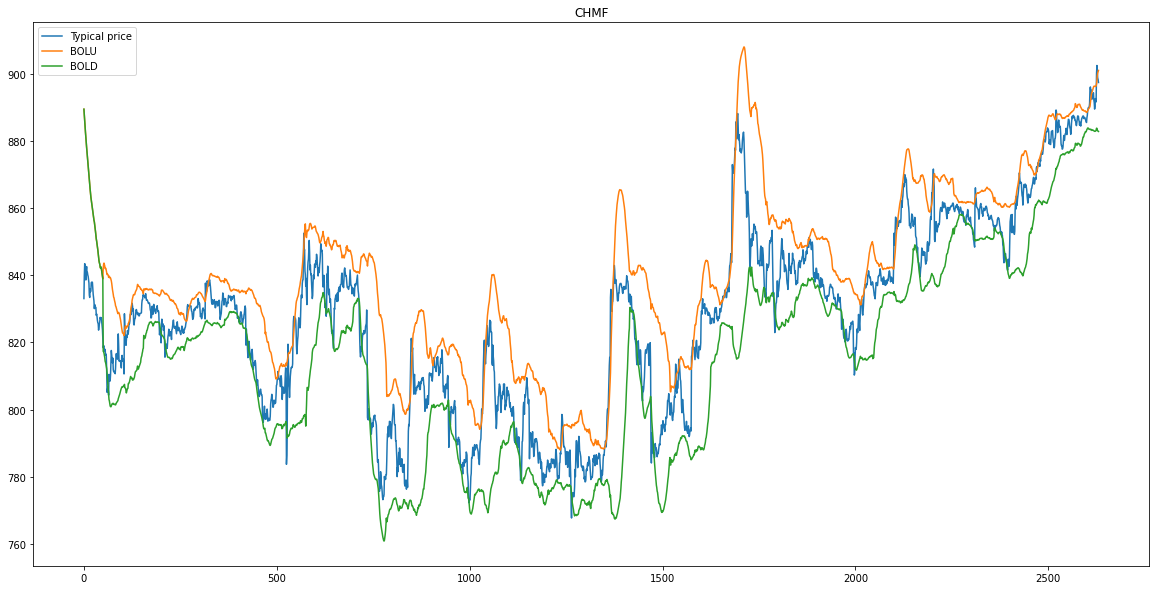

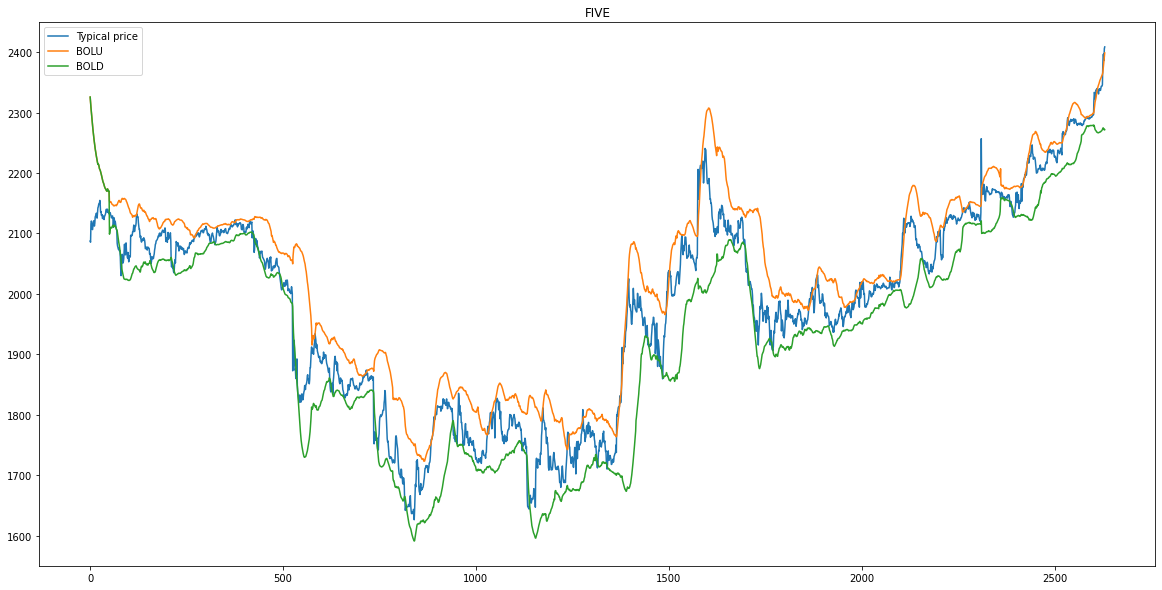

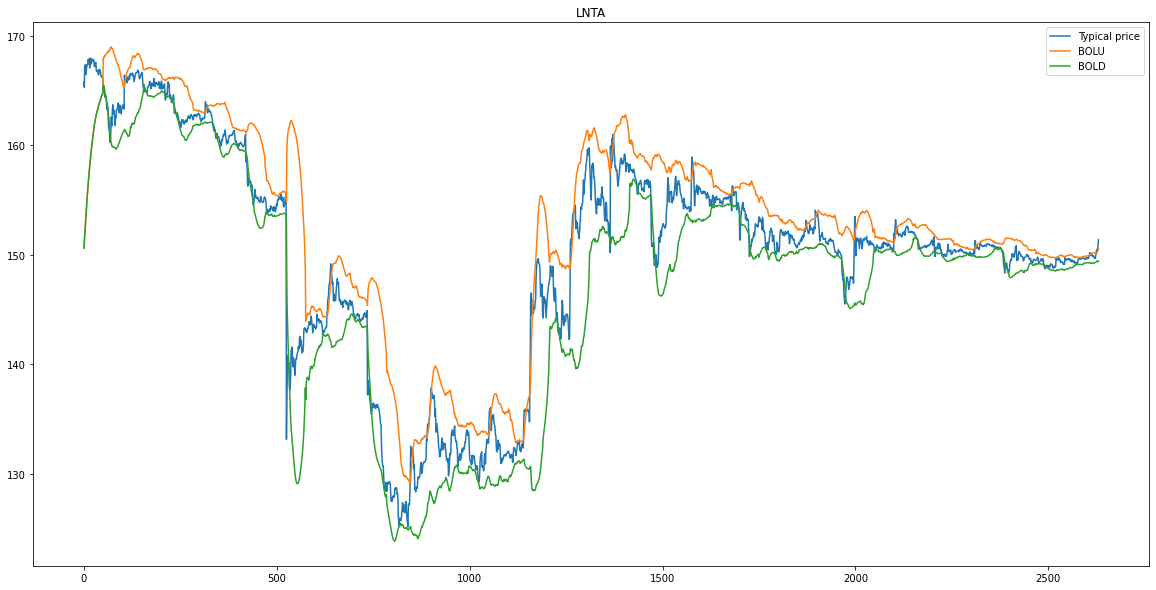

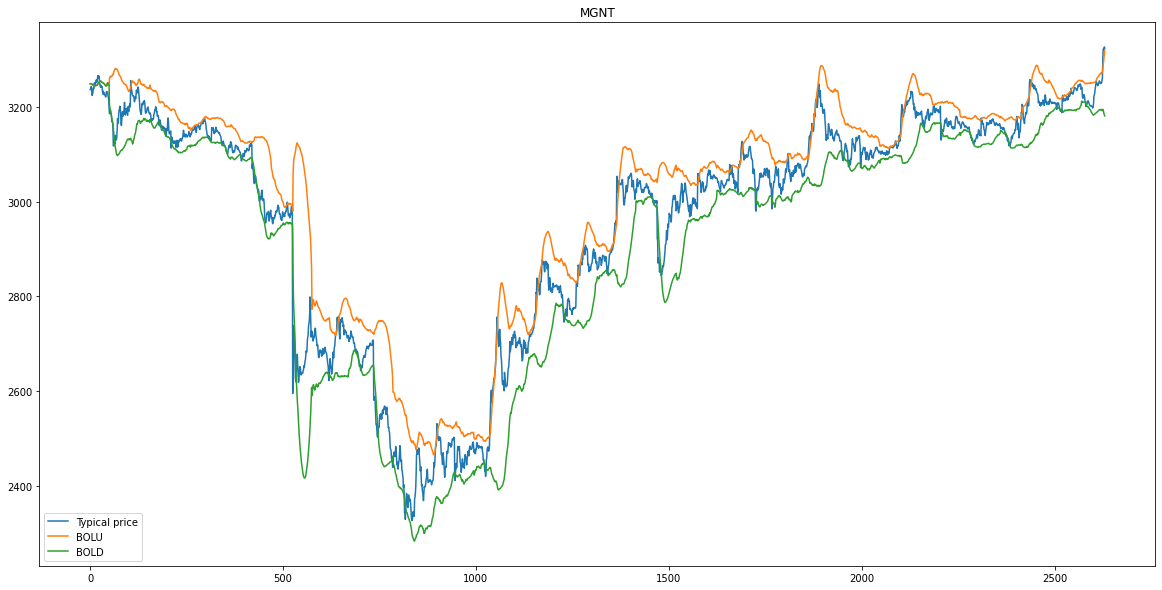

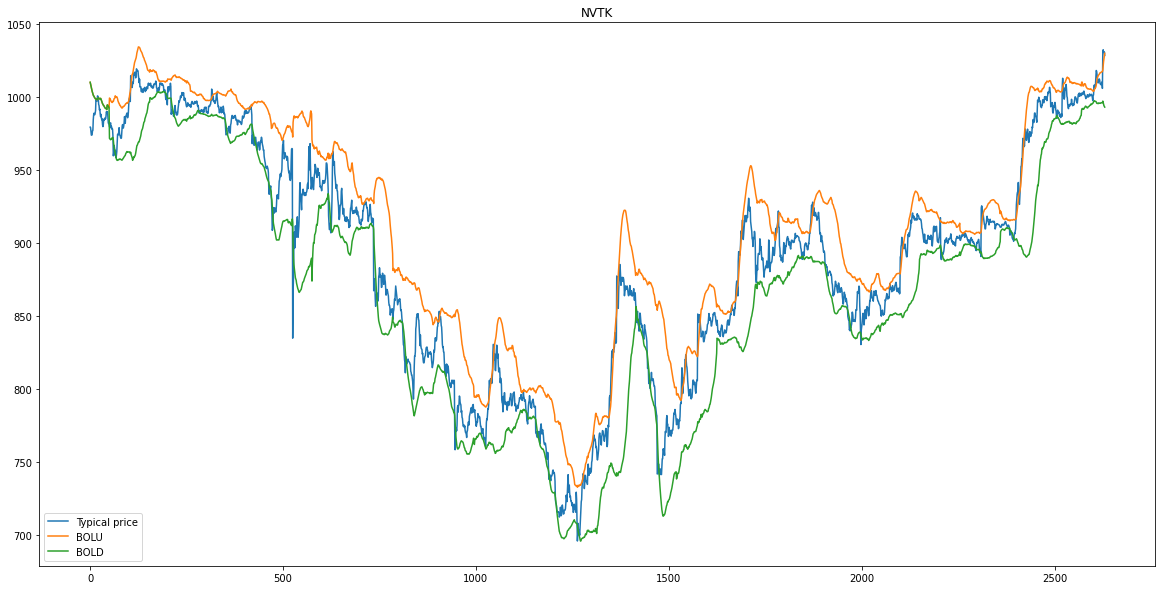

In [16]:
for company in dataframes:
    plot_data(company)